In [76]:
import pandas as pd


#read and parse the training set .csv features file 
df = pd.read_csv('A3-data.txt', delimiter = ',', usecols=['x', 'y', 'z', 't'])
y = pd.read_csv('A3-data.txt', delimiter = ',', usecols=['class'])
y = y[y.columns[0]]
df.head()
print(y)

0      1
1      5
2      2
3      1
4      4
      ..
355    6
356    2
357    6
358    3
359    6
Name: class, Length: 360, dtype: int64


In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

k_means = KMeans(n_clusters=6)
k_means.fit(df)
y_pred = k_means.labels_

#print(k_means.labels_ + 1)
#print(k_means.cluster_centers_)
print("predicted labels") 
print(y_pred)
print("true labels") 
print(y ) 
#print(y)


predicted labels
[5 2 3 5 0 2 2 2 2 4 3 1 5 3 3 3 3 0 1 3 4 5 3 0 1 2 2 1 3 5 1 4 2 3 2 0 3
 0 0 1 0 5 3 0 0 3 0 2 2 0 2 3 3 2 2 2 3 1 1 4 2 4 4 5 3 1 3 4 3 0 3 5 2 5
 3 4 3 2 5 5 0 0 2 2 2 0 2 3 3 2 1 4 2 1 3 1 0 0 3 3 2 0 1 4 3 1 4 5 3 2 3
 3 2 4 3 1 3 2 0 4 3 2 3 3 1 2 3 0 4 4 2 2 4 3 4 0 0 3 3 2 0 3 4 2 3 4 4 2
 1 2 3 4 4 1 1 1 2 1 2 1 1 3 1 1 5 1 2 3 1 4 3 1 4 0 3 3 5 3 2 3 3 3 2 3 1
 3 5 3 4 3 4 4 3 2 4 4 0 3 0 0 4 4 0 0 2 2 2 5 1 2 3 5 3 3 0 3 0 5 1 0 3 0
 3 3 4 3 1 1 2 0 3 3 0 2 4 1 1 3 3 3 5 3 2 1 2 3 3 3 3 3 3 0 0 0 3 4 3 1 1
 5 1 3 0 0 1 1 5 3 3 3 1 0 1 3 3 0 1 3 2 3 3 2 2 0 2 1 2 1 2 1 0 2 2 5 5 2
 1 5 0 5 2 2 3 1 5 0 3 5 3 0 1 1 1 0 0 3 2 3 3 5 4 3 4 0 3 3 3 2 0 2 2 2 3
 3 3 3 3 3 5 1 3 2 3 3 3 5 4 2 0 1 3 4 2 3 3 2 3 1 1 5]
true labels
0      1
1      5
2      2
3      1
4      4
      ..
355    6
356    2
357    6
358    3
359    6
Name: class, Length: 360, dtype: int64


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [78]:
import numpy as np

# Perform label matching using the Hungarian algorithm
y_true_matched = np.zeros_like(y_pred)
for i in np.unique(y_pred):
    mask = y_pred == i
    print(y[mask])
    count = np.bincount(y[mask])
    true_label = np.argmax(count)
    y_true_matched[mask] = true_label

print(y_true_matched)

4      4
17     4
23     4
35     4
37     4
38     4
40     4
43     6
44     4
46     4
49     4
69     4
80     6
81     4
85     6
96     6
97     4
101    4
118    6
127    4
135    4
136    4
140    4
173    4
196    6
198    4
199    4
202    4
203    4
214    6
216    4
219    4
221    4
229    4
232    4
251    4
252    4
253    4
262    4
263    4
271    4
275    6
283    4
290    4
298    6
305    6
309    6
313    4
314    6
323    4
328    4
348    4
Name: class, dtype: int64
11     1
18     6
24     6
27     6
30     3
39     1
57     1
58     3
65     3
90     3
93     1
95     1
102    1
105    6
115    6
124    6
148    3
153    1
154    1
155    3
157    6
159    3
160    1
162    6
163    3
165    1
168    1
171    6
184    3
208    3
218    6
226    3
227    3
235    1
236    3
243    1
257    3
258    1
260    3
264    6
265    6
270    3
272    3
276    1
285    6
287    3
289    3
296    1
303    1
310    1
311    1
312    1
339    3
349    1
357    6
358    3
Na

In [79]:
conf_matrix = confusion_matrix(y, y_true_matched)
print(conf_matrix)

[[ 41   0   0   0   8  14]
 [  0 100   0   0   0   0]
 [ 21   0   0   0   0   0]
 [  0   0   0  40   0   0]
 [  0   0   0   0  36   0]
 [ 32  13   0  12  26  17]]


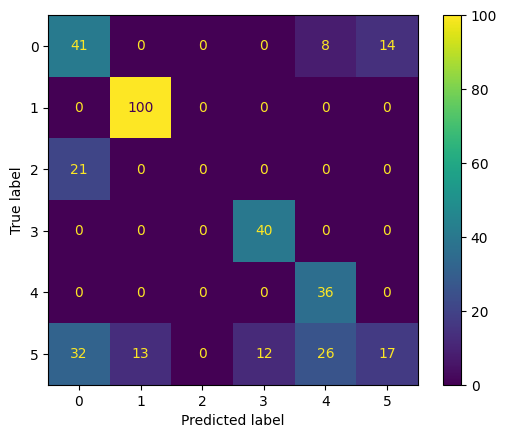

In [81]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y
predicted = y_true_matched

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()